# **PCA**







# Step 1 : import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 2: Importing the data set

### Import the dataset and distributing the dataset into X and y components for data analysis.




In [2]:
# Load the Wine dataset
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

df['target'] = wine_data.target

X = df.drop(columns='target')
y = df['target']

# Step 3: Splitting the dataset into the Training set and Test set





In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling
### Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [4]:
# Apply feature scaling to the training and test sets
src = StandardScaler()
X_train_ = src.fit_transform(X_train)
X_test_ = src.transform(X_test)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (178, 13)
Shape of y: (178,)


# Step 5: Applying PCA function
### Applying the PCA function into the training and testing set for analysis.




In [5]:
# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_)
X_test_pca = pca.transform(X_test_)

# Step 6: Fitting Logistic Regression To the training set




In [6]:
# Fit Logistic Regression to the training set
lr = LogisticRegression(random_state=42)
lr.fit(X_train_pca, y_train)

# Display model coefficients
print("Logistic Regression coefficients:")
print(lr.coef_)

Logistic Regression coefficients:
[[ 1.0560776  -0.74396378]
 [ 0.25959938  1.85617585]
 [-1.31567699 -1.11221207]]


# Step 7: Predicting the test set result




In [7]:
y_pred = lr.predict(X_test_pca)

print("Predicted results for the test set:")
print(y_pred[:10])

Predicted results for the test set:
[0 0 2 0 1 0 1 2 1 2]


# Step 8: Making the confusion matrix




In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Accuracy: 1.0


# Step 9: Predicting the training set result




In [9]:
y_train_pred = lr.predict(X_train_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", train_accuracy)

Accuracy: 0.9507042253521126


# Step 10: Visualizing the Test set results




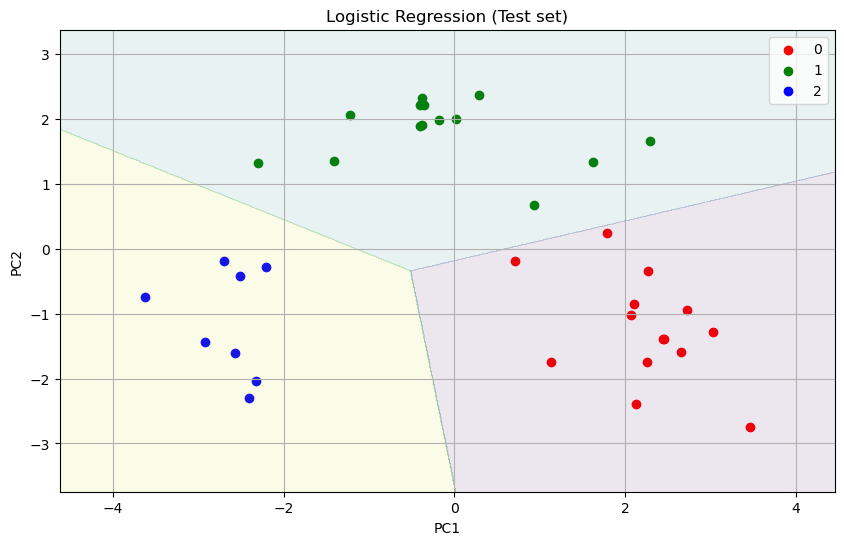

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1], color='red', label='0')
plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], color='green', label='1')
plt.scatter(X_test_pca[y_test == 2, 0], X_test_pca[y_test == 2, 1], color='blue', label='2')

# Decision boundary visualization
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.1)

plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# components
pca.components_

array([[ 0.12753249, -0.25623655, -0.02236181, -0.24428137,  0.14757757,
         0.38490786,  0.41950095, -0.2992598 ,  0.30843734, -0.11907301,
         0.29949964,  0.38381622,  0.27587548],
       [-0.4928047 , -0.1904464 , -0.31676447,  0.03513857, -0.26217161,
        -0.09601687, -0.01513129, -0.07626286, -0.0738558 , -0.53396728,
         0.28133315,  0.14274046, -0.381054  ]])

#**Well Done :)**
Now let's practice!